# BarPlot (막대 그래프)

집단별로 빈도수나 평균등의 집계 결과값을 표현하는 그래프

## #01. 준비작업

### [1] 패키지 참조

In [31]:
import sys
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as plt

### [2] 데이터 가져오기

In [32]:
origin = read_excel("https://data.hossam.kr/pydata/grade.xlsx", index_col="이름")
origin

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
영호,4,남자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,1,남자,91,90,89,80


### [3] 그래프 초기화

In [33]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.unicode_minus"] = False

## #02. 세로 막대 그래프

### [1] 학년별 평균 데이터 구하기

In [34]:
df = origin.drop('성별', axis=1).groupby('학년', as_index=False).mean()
df

,학년,국어,영어,수학,과학
0,1,92.75,82.25,85.25,79.5
1,2,85.00,104.00,70.50,81.0
2,3,63.00,60.00,31.00,71.0
3,4,77.50,69.00,90.50,80.0


### [2] 그래프에 적용할 항목 선정

그래프에 적용 가능한 형태는 `list`, `tuple`, `ndarray`, `Series` 모두 가능

In [35]:
y = list(df['국어'])
x = list(range(0, len(y)))
xticks = ["%d학년" % i for i in df['학년']]
x, y, xticks

([0, 1, 2, 3], [92.75, 85.0, 63.0, 77.5], ['1학년', '2학년', '3학년', '4학년'])

### [3] 그래프 생성

`pyplot` 객체의 `bar(xdata, ydata)`메서드를 사용한다.

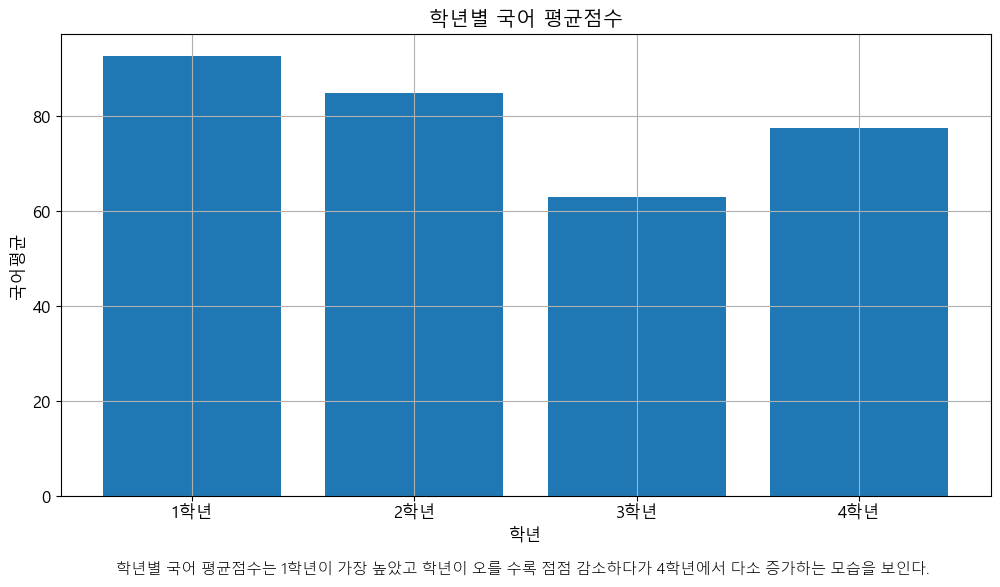

In [36]:
plt.figure()
plt.title("학년별 국어 평균점수")
plt.bar(x, y)
plt.xlabel("학년")
plt.ylabel("국어평균")
plt.xticks(x, xticks)
plt.grid()

txt = "학년별 국어 평균점수는 1학년이 가장 높았고 학년이 오를 수록 점점 감소하다가 4학년에서 다소 증가하는 모습을 보인다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})

plt.show()
plt.close()

### [4] 색상 지정하기

#### (1) 단색

`pyplot` 객체의 `bar()`메서드에 `color` 파라미터를 지정한다.

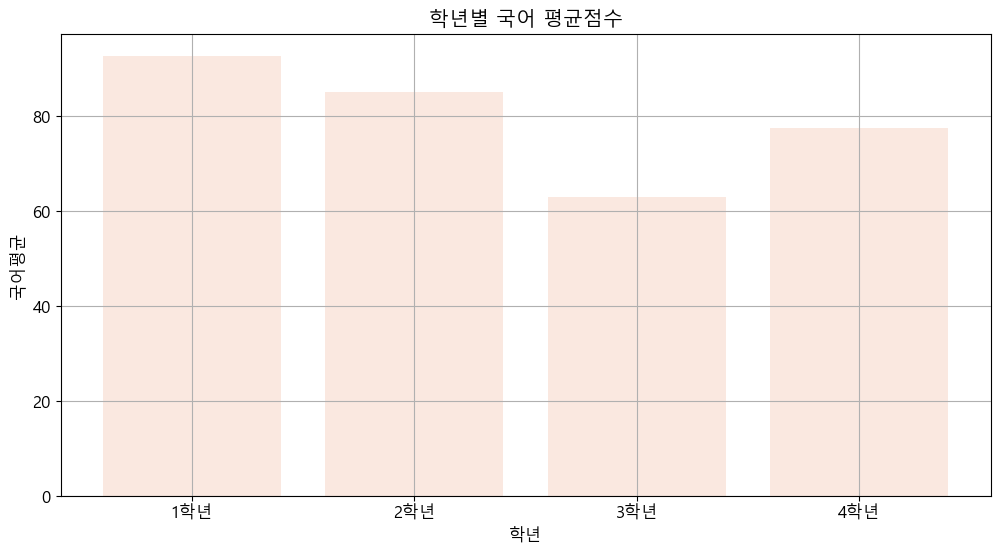

In [37]:
plt.figure()
plt.title("학년별 국어 평균점수")
plt.bar(x, y, color="#FAE8E0")
plt.xlabel("학년")
plt.ylabel("국어평균")
plt.xticks(x, xticks)
plt.grid()
plt.show()
plt.close()

#### (2) 막대별로 개별 색상 지정하기

`color` 파라미터의 값을 리스트 형태로 지정한다. 

리스트의 원소는 색상값을 의미하고, 막대의 수 만큼 원소를 갖는다.

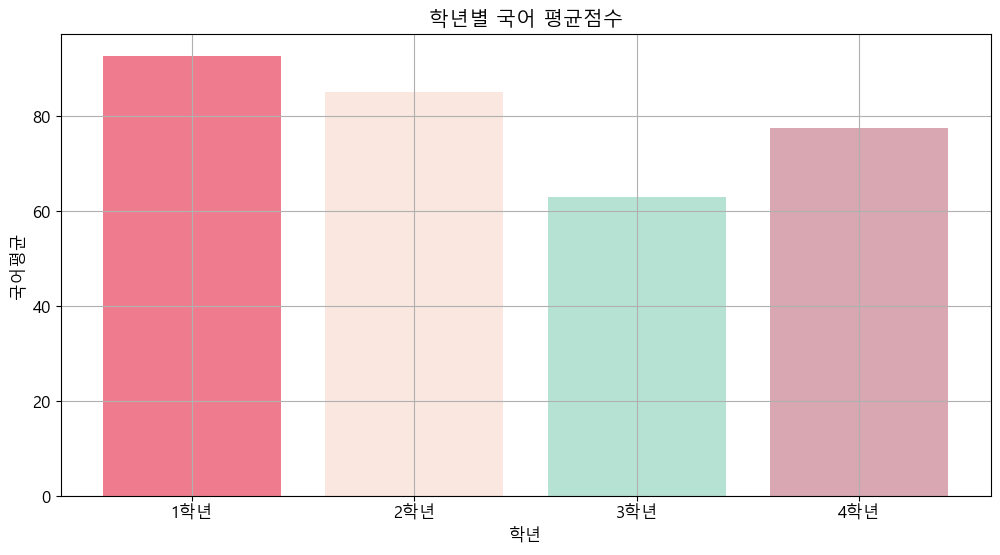

In [38]:
plt.figure()
plt.title("학년별 국어 평균점수")
plt.bar(x, y, color=['#EF7C8E', '#FAE8E0', '#B6E2D3', '#D8A7B1'])
plt.xlabel("학년")
plt.ylabel("국어평균")
plt.xticks(x, xticks)
plt.grid()
plt.show()
plt.close()

## #03. 가로 막대 그래프

가로 막대 그래프인 경우 `barh(ydata, xdata)` 메서드를 사용

### (1) 변수 생성하기

세로 막대 그래프와 비교하여 `x`와 `y`의 역할이 서로 바뀌어야 한다.

In [39]:
x = list(df['국어'])
y = list(range(0, len(y)))
yticks = ["%d학년" % i for i in df['학년']]
x, y, yticks

([92.75, 85.0, 63.0, 77.5], [0, 1, 2, 3], ['1학년', '2학년', '3학년', '4학년'])

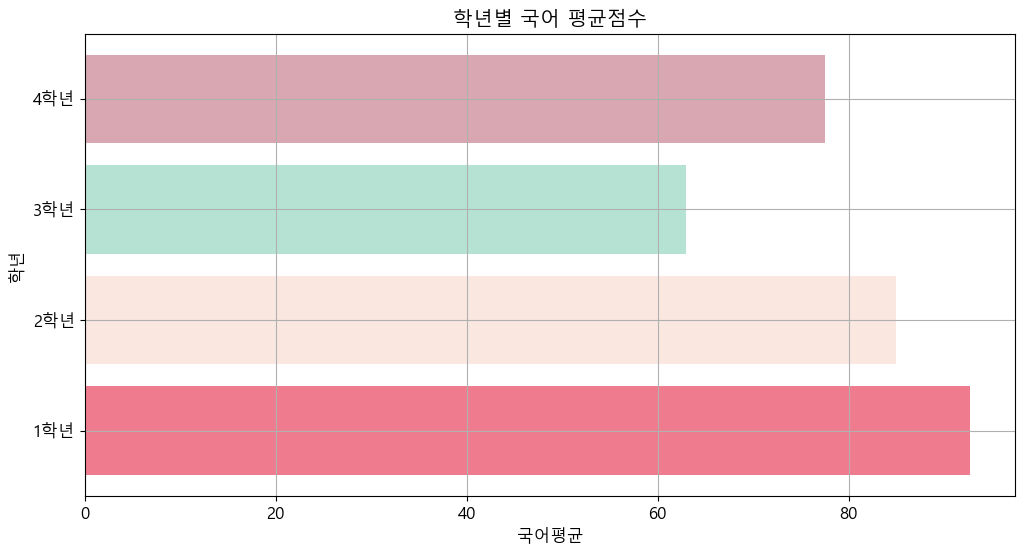

In [40]:
plt.figure()
plt.title("학년별 국어 평균점수")
plt.barh(y, x, color=['#EF7C8E', '#FAE8E0', '#B6E2D3', '#D8A7B1'])
plt.ylabel("학년")
plt.xlabel("국어평균")
plt.yticks(y, yticks)
plt.grid()
plt.show()
plt.close()

## #04. 세로 다중 막대 그래프

### (1) 변수 생성하기

다중 막대 그래프의 경우 `x`축을 좌표값(숫자)를 원소로 갖는 `ndarray`로 처리하는 것이 유리

In [41]:
y1 = list(df['국어'])
y2 = list(df['영어'])
x = np.arange(0, len(y1))
xticks = ["%d학년" % i for i in df['학년']]
y1, y2, x, xticks

([92.75, 85.0, 63.0, 77.5],
 [82.25, 104.0, 60.0, 69.0],
 array([0, 1, 2, 3]),
 ['1학년', '2학년', '3학년', '4학년'])

### (2) 그래프 그리기

각 막대의 넓이(`width`)를 지정하고 각 막대를 넓이의 `1/2`씩 앞뒤로 이동 시켜야 한다.

`width` 파라미터는 `0~1`사이의 값을 갖는다.

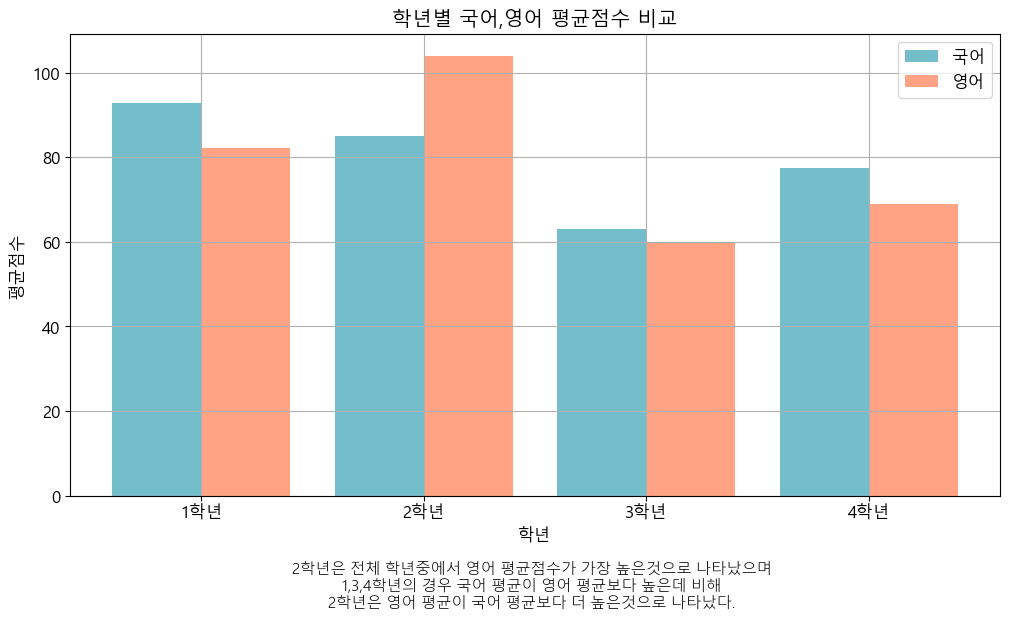

In [45]:
plt.figure()
plt.title("학년별 국어,영어 평균점수 비교")
plt.bar(x-0.2, y1, color='#74BDCB', label='국어', width=0.4)
plt.bar(x+0.2, y2, color='#FFA384', label='영어', width=0.4)
plt.xlabel("학년")
plt.ylabel("평균점수")
plt.xticks(x, xticks)
plt.legend()
plt.grid()

txt = """2학년은 전체 학년중에서 영어 평균점수가 가장 높은것으로 나타났으며
1,3,4학년의 경우 국어 평균이 영어 평균보다 높은데 비해
2학년은 영어 평균이 국어 평균보다 더 높은것으로 나타났다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})

plt.show()
plt.close()

## #05. 가로 다중 막대 그래프

### (1) 변수 생성하기

In [43]:
x1 = list(df['국어'])
x2 = list(df['영어'])
y = np.arange(0, len(y1))
yticks = ["%d학년" % i for i in df['학년']]
x1, x2, y, yticks

([92.75, 85.0, 63.0, 77.5],
 [82.25, 104.0, 60.0, 69.0],
 array([0, 1, 2, 3]),
 ['1학년', '2학년', '3학년', '4학년'])

### (2) 그래프 그리기

가로 막대 그래프이므로 넓이(`width`)가 아닌 높이(`height`)를 조절해야 한다.

`x`축 이동이 아닌 `y`축 이동이 발생한다.

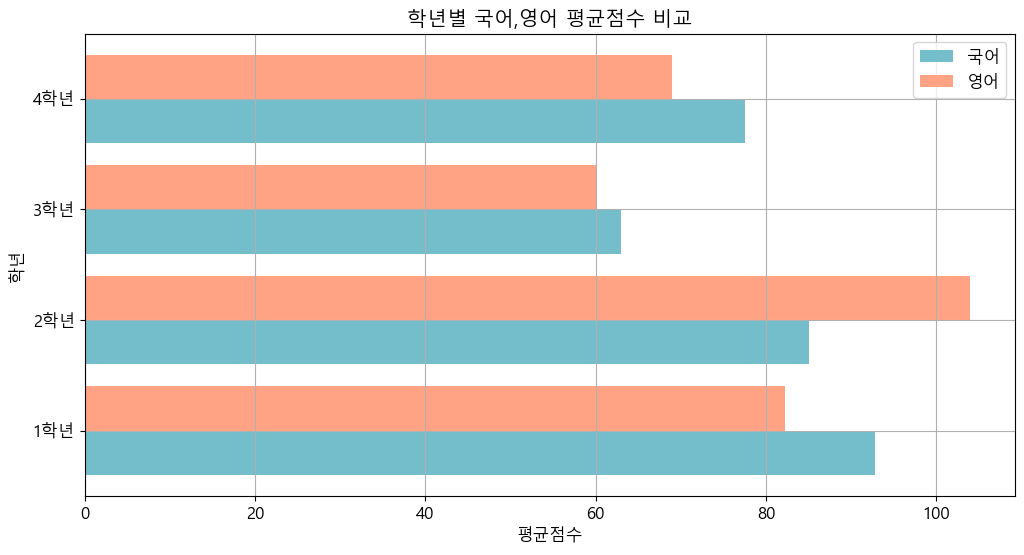

In [44]:
plt.figure()
plt.title("학년별 국어,영어 평균점수 비교")
plt.barh(y-0.2, x1, color='#74BDCB', label='국어', height=0.4)
plt.barh(y+0.2, x2, color='#FFA384', label='영어', height=0.4)
plt.ylabel("학년")
plt.xlabel("평균점수")
plt.yticks(y, yticks)
plt.legend()
plt.grid()
plt.show()
plt.close()